## Market Mix Modelling

### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from joblib import Parallel, delayed
from multiprocessing import Manager


# Load the dataset
file_path = "C:\\Users\\tusha\\Downloads\\Case_Study_Input_File.xlsx"
df = pd.read_excel(file_path)

df.head(5)    

,date,kpi_val_sales_mn,vol_sales_mn,wtd_dist_max,num_dist_max,trade_promo_spends_mn,consumer_promo_spends_mn,newspaper_spends_mn,newspaper_impressions,tv_total_grp,...,whatsapp_clicks,whatsapp_impressions_mn,whatsapp_spends_mn,jio_clicks,jio_impressions_mn,jio_spends_mn,hotstar_clicks,hotstar_impressions_mn,hotstar_spends_mn,ventes_avenue_spends_mn
0,2019-01-01,232.467056,302.394,60.339142,28.076869,6.386184,0.000000,0.000000,0,300.21,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0
1,2019-02-01,214.927168,279.889,60.897473,28.184146,6.903101,0.000000,4.558687,22,397.51,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0
2,2019-03-01,243.621484,318.025,60.356401,28.494586,6.378913,0.000000,5.228202,11,184.26,...,0,0.0,0.0,0,0.0,0.0,3545,2.533335,0.3828,0.0
3,2019-04-01,251.191704,328.868,58.884626,28.637880,6.807898,0.960220,0.000000,0,0.00,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0
4,2019-05-01,243.752604,318.636,60.130245,28.579280,4.139811,0.770213,0.000000,0,317.83,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0


In [2]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                48 non-null     datetime64[ns]
 1   kpi_val_sales_mn                    48 non-null     float64       
 2   vol_sales_mn                        48 non-null     float64       
 3   wtd_dist_max                        48 non-null     float64       
 4   num_dist_max                        48 non-null     float64       
 5   trade_promo_spends_mn               48 non-null     float64       
 6   consumer_promo_spends_mn            48 non-null     float64       
 7   newspaper_spends_mn                 48 non-null     float64       
 8   newspaper_impressions               48 non-null     int64         
 9   tv_total_grp                        48 non-null     float64       
 10  tv_spots                    

In [3]:
df.describe()

,kpi_val_sales_mn,vol_sales_mn,wtd_dist_max,num_dist_max,trade_promo_spends_mn,consumer_promo_spends_mn,newspaper_spends_mn,newspaper_impressions,tv_total_grp,tv_spots,...,whatsapp_clicks,whatsapp_impressions_mn,whatsapp_spends_mn,jio_clicks,jio_impressions_mn,jio_spends_mn,hotstar_clicks,hotstar_impressions_mn,hotstar_spends_mn,ventes_avenue_spends_mn
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,...,48.000000,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,293.722501,409.403229,61.553713,31.537910,8.646890,5.047986,1.728549,7.31250,264.092001,700.958333,...,7094.145833,0.144167,0.027708,8.252008e+04,3.141996,0.138729,1149.041667,0.671736,0.159433,0.019000
std,59.224222,105.461019,3.482679,2.947466,3.236527,6.276398,4.787785,19.40186,212.433525,639.050391,...,49149.684079,0.998816,0.191969,4.316646e+05,20.101377,0.606686,4853.979179,2.619891,0.644600,0.127003
min,126.291278,166.944000,53.203745,27.335125,3.261926,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,253.159445,328.149000,59.617900,28.702618,6.300529,0.862939,0.000000,0.00000,34.022500,81.500000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,306.686986,405.809000,61.286741,31.419246,7.807479,2.797708,0.000000,0.00000,301.405000,589.500000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,344.195365,504.379750,64.566022,34.815109,10.767277,6.550619,0.000000,0.00000,425.205000,1169.750000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,368.123912,572.466934,66.772684,35.823721,17.150717,29.834155,24.589793,101.00000,657.800000,2311.000000,...,340519.000000,6.920000,1.330000,2.960579e+06,139.410000,4.050000,27801.000000,14.690000,3.680000,0.880000


In [4]:
# Checking the duplicated entries.
df.duplicated().sum()

0

### Exploratory Data Analysis

#### Media Spent over the Time Analysis

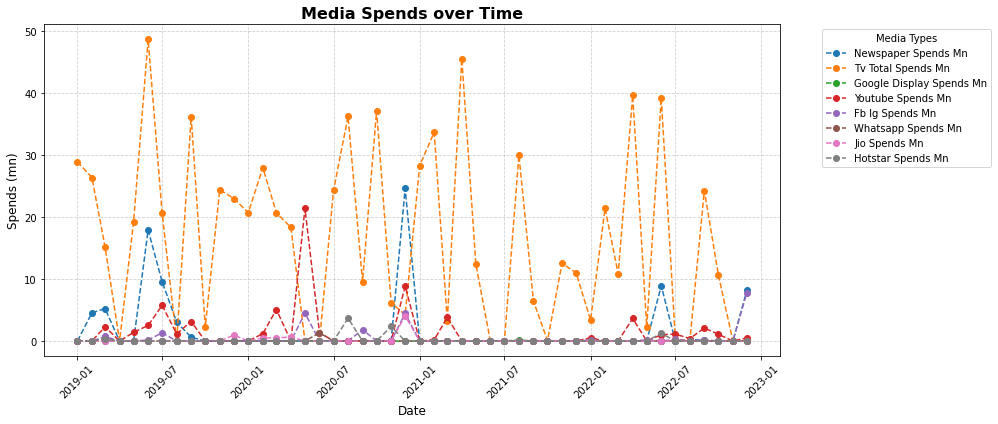

In [5]:
# Example media spend columns based on your image
media_columns = [
    'newspaper_spends_mn', 
    'tv_total_spends_mn', 
    'google_display_spends_mn', 
    'youtube_spends_mn', 
    'fb_ig_spends_mn', 
    'whatsapp_spends_mn', 
    'jio_spends_mn', 
    'hotstar_spends_mn'
]

# Create the plot
plt.figure(figsize=(14, 6))

# Plot each media spend column
for col in media_columns:
    plt.plot(df['date'], df[col], marker='o', linestyle='--', label=col.replace('_', ' ').title())

# Add title and labels
plt.title('Media Spends over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Spends (mn)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Media Types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* The graph shows fluctuations in media spends, with some months showing sharp peaks while others have very little or no spending.
* The orange dashed line represents TV Total Spends, which is by far the highest and most frequent among all media types. There are several spikes where TV spends reached around or above 40-50 mn, indicating significant advertising campaigns.
* Newspaper, YouTube, Facebook, and WhatsApp spends are visible but relatively low. Most of these lines hover near zero, with occasional peaks suggesting smaller campaigns or targeted promotions.
* Peaks across all channels around specific months (especially early 2019, mid-2020, and late 2022) suggest campaigns linked to events, festivals, or product launches. The irregular spikes reflect that media spends were not uniform and were perhaps driven by business needs or external factors.
* Channels like Hotstar, Jo, and WhatsApp have barely noticeable spending throughout the period, indicating they were either used minimally or not at all in some months.

**Channels like Hotstar, Jio, and WhatsApp have barely noticeable spending throughout the period, indicating they were either used minimally or not at all in some months. Other channels like YouTube and Facebook were used occasionally, perhaps for targeted digital campaigns rather than continuous investment.**

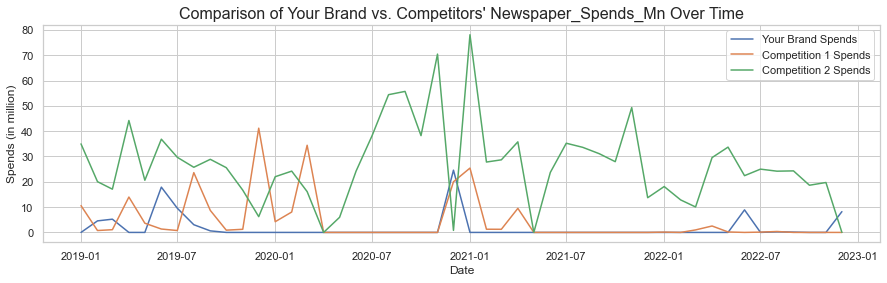

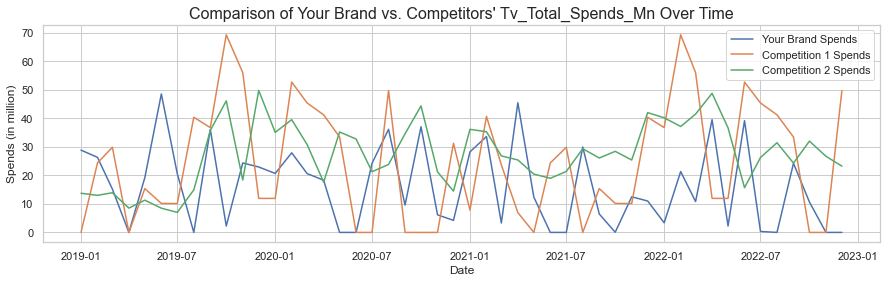

In [6]:
# Competitive Media Spending Analysis

compatitors_df = df.copy()
compatitors_df.set_index('date', inplace=True)

# List of media channels where compatitors spendinng money
media_columns = [
    'newspaper_spends_mn',
    'tv_total_spends_mn'
]

# Plotting the Comparison for Each Channel
sns.set(style="whitegrid")

for channel in media_columns:
    # Select the relevant columns for the current channel
    plot_df = compatitors_df[[channel]].copy()
    
    # Check if competitor data exists for this channel and add it if it does
    if f'competition1_{channel}' in df.columns:
        plot_df[f'competition1_{channel}'] = compatitors_df[f'competition1_{channel}']
    if f'competition2_{channel}' in df.columns:
        plot_df[f'competition2_{channel}'] = compatitors_df[f'competition2_{channel}']

    # Create a single figure for the current channel's comparison
    plt.figure(figsize=(15, 4))

    # Plot the spending for each brand
    plt.plot(plot_df.index, plot_df[channel], label='Your Brand Spends')
    if f'competition1_{channel}' in plot_df.columns:
        plt.plot(plot_df.index, plot_df[f'competition1_{channel}'], label='Competition 1 Spends')
    if f'competition2_{channel}' in plot_df.columns:
        plt.plot(plot_df.index, plot_df[f'competition2_{channel}'], label='Competition 2 Spends')

    # Addong titles and labels
    plt.title(f'Comparison of Your Brand vs. Competitors\' {channel.title()} Over Time', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Spends (in million)')
    plt.legend()
    plt.grid(True)
    plt.show()


Based on the charts, In newspaper advertising, the brand's spending has been minimal and has dropped to almost nothing since mid-2020, while Competitor 1 has maintained a moderate, sporadic presence, and Competitor 2 has consistently been the most aggressive spender, with major peaks often exceeding 40 million dollers. In contrast, the TV advertising landscape is highly competitive, with all three brands making significant investments. The brand's TV spending has fluctuated with high peaks in late 2019, early 2020, early 2021, and mid-2022. Competitor 1 also engages in a strategy of large, intermittent TV campaigns, with a massive spike reaching nearly $70 million in late 2019. Meanwhile, Competitor 2 stands out with the most consistent and stable TV spending, maintaining a high level of investment throughout the years.

The brand should strategically re-evaluate its media spending to align with market trends and competitor behavior. Don't simply follow the competitors, but rather learn from them to build a more robust, multi-channel marketing strategy


#### Total Spends on Different Marketing Channels - Brand and Compatitors

In [7]:
# Total Spends on Different channels
spending_columns = [
    'trade_promo_spends_mn',
    'consumer_promo_spends_mn',
    'newspaper_spends_mn',
    'tv_total_spends_mn',
    'competition1_newspaper_spends_mn',
    'competition1_tv_total_spends_mn',
    'competition2_newspaper_spends_mn',
    'competition2_tv_total_spends_mn',
    'google_display_spends_mn',
    'youtube_spends_mn',
    'fb_ig_spends_mn',
    'whatsapp_spends_mn',
    'jio_spends_mn',
    'hotstar_spends_mn',
    'ventes_avenue_spends_mn',
]

platform_spending = df[spending_columns].sum()
grand_total_spending = platform_spending.sum()
print('Total Spending for Each Platform (in million $):')
print("--------------------------------------------------------------------------------")
print(platform_spending.to_string())
print("--------------------------------------------------------------------------------")
print(f"Grand Total Spending across all platforms: ${grand_total_spending:,.2f} million")

Total Spending for Each Platform (in million $):
--------------------------------------------------------------------------------
trade_promo_spends_mn                415.050709
consumer_promo_spends_mn             242.303326
newspaper_spends_mn                   82.970330
tv_total_spends_mn                   784.914121
competition1_newspaper_spends_mn     216.220221
competition1_tv_total_spends_mn     1189.143192
competition2_newspaper_spends_mn    1280.635360
competition2_tv_total_spends_mn     1312.913136
google_display_spends_mn               0.522200
youtube_spends_mn                     68.523800
fb_ig_spends_mn                       21.756800
whatsapp_spends_mn                     1.330000
jio_spends_mn                          6.659000
hotstar_spends_mn                      7.652800
ventes_avenue_spends_mn                0.912000
--------------------------------------------------------------------------------
Grand Total Spending across all platforms: $5,631.51 million


In [8]:
# Total Spending across TV and Newspaper 
total_your_brand_spends = df['newspaper_spends_mn'].sum() + df['tv_total_spends_mn'].sum()
total_competitor1_spends = df['competition1_newspaper_spends_mn'].sum() + df['competition1_tv_total_spends_mn'].sum()
total_competitor2_spends = df['competition2_newspaper_spends_mn'].sum() + df['competition2_tv_total_spends_mn'].sum()

# Display the results
print('Total Combined Spending across TV and Newspaper Channels:')
print("-----------------------------------------------------------")
print(f"The brand    : ${total_your_brand_spends:,.2f} million")
print(f"Competitor 1 : ${total_competitor1_spends:,.2f} million")
print(f"Competitor 2 : ${total_competitor2_spends:,.2f} million")

Total Combined Spending across TV and Newspaper Channels:
-----------------------------------------------------------
The brand    : $867.88 million
Competitor 1 : $1,405.36 million
Competitor 2 : $2,593.55 million


These figures indicate a distinct difference in strategy:

* **Market Dominance**: Competitor 2 is likely pursuing an aggressive, market-dominant strategy by investing heavily in both TV and newspaper advertising to capture the highest share of voice and maintain brand awareness.

* **Active Competition** : Competitor 1 is also a strong player, investing substantially more than the brand to actively compete for market share in these traditional channels.

* **Strategic Allocation** : The brand's relatively lower spending suggests a different strategic focus. This could be a decision to allocate a greater portion of the marketing budget to other platforms, or a more conservative approach to traditional media.

#### Cost Per Million Impressions

In [9]:
# Calculate total spends and impressions/clicks
hotstar_spend = df['hotstar_spends_mn'].sum()
hotstar_impressions = df['hotstar_impressions_mn'].sum()
youtube_spend = df['youtube_spends_mn'].sum()
youtube_impressions = df['youtube_impressions_mn'].sum()
jio_spend = df['jio_spends_mn'].sum()
jio_impressions = df['jio_impressions_mn'].sum()
fb_ig_spend = df['fb_ig_spends_mn'].sum()
fb_ig_impressions = df['fb_ig_impressions_mn'].sum()
google_display_spend = df['google_display_spends_mn'].sum()
google_display_impressions = df['google_display_impressions_mn'].sum()

tv_spend = df['tv_total_spends_mn'].sum()
tv_impressions = df['tv_total_grp'].sum() * df['tv_spots'].mean()  # Approximation based on GRP and average spots
# Note: A more precise TV impression calculation requires more data, but this is a reasonable proxy.

newspaper_spend = df['newspaper_spends_mn'].sum()
newspaper_impressions = df['newspaper_impressions'].sum()

# Calculate CPM (Cost Per Million Impressions)
# Formula: (Total Spend / Total Impressions) * 1,000,000

cpm = {
    'Hotstar': (hotstar_spend / hotstar_impressions),
    'YouTube': (youtube_spend / youtube_impressions),
    'Jio': (jio_spend / jio_impressions),
    'FB/IG': (fb_ig_spend / fb_ig_impressions),
    'Google Display': (google_display_spend / google_display_impressions),
    'Newspaper': (newspaper_spend * 1000000) / newspaper_impressions,
    'TV': (tv_spend * 1000000) / tv_impressions
}

# Print the results
print("Cost Per Million Impressions (CPM) in $ : ")
print("-----------------------------------------------------------")

for channel, value in cpm.items():
    print(f"{channel} : {value :,.2f}$")
    
print("-----------------------------------------------------------")
    

Cost Per Million Impressions (CPM) in $ : 
-----------------------------------------------------------
Hotstar : 0.24$
YouTube : 0.08$
Jio : 0.04$
FB/IG : 0.04$
Google Display : 0.09$
Newspaper : 236,382.71$
TV : 88.34$
-----------------------------------------------------------


#### Data Preperation 

In [10]:
columns_to_drop = [
    'newspaper_spends_mn',
    'newspaper_impressions',
    'competition1_newspaper_spends_mn',
    'competition1_newspaper_impressions',
    'competition1_tv_total_grp',
    'competition1_tv_spots',
    'competition1_tv_total_spends_mn',
    'competition2_newspaper_spends_mn',
    'competition2_newspaper_impressions',
    'competition2_tv_total_grp',
    'competition2_tv_spots',
    'competition2_tv_total_spends_mn',
    'google_display_clicks',
    'google_display_impressions_mn',
    'google_display_spends_mn',
    'youtube_clicks',
    'youtube_impressions_mn',
    'fb_ig_clicks',
    'fb_ig_impressions_mn',
    'whatsapp_clicks',
    'whatsapp_impressions_mn',
    'jio_clicks',
    'jio_impressions_mn',
    'hotstar_clicks',
    'hotstar_impressions_mn',
    'hotstar_spends_mn',
    'ventes_avenue_spends_mn'
]

df_clean = df.copy()
df_clean.drop(columns=columns_to_drop, inplace=True)

# Data Cleaning: Check for Missing Values
missing_values = df_clean.isnull().sum()
if missing_values.sum() > 0:
    print("Warning: Missing values found in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found. The data is clean.")

# Visualizations for all numerical features
# Convert 'date' to datetime for proper plotting
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Set up the plotting style
sns.set(style="whitegrid")

# Identify all columns to plot against sales
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_to_plot = [col for col in numerical_cols if col != 'kpi_val_sales_mn']

No missing values found. The data is clean.


In [11]:
numerical_cols

['kpi_val_sales_mn',
 'vol_sales_mn',
 'wtd_dist_max',
 'num_dist_max',
 'trade_promo_spends_mn',
 'consumer_promo_spends_mn',
 'tv_total_grp',
 'tv_spots',
 'tv_total_spends_mn',
 'youtube_spends_mn',
 'fb_ig_spends_mn',
 'whatsapp_spends_mn',
 'jio_spends_mn']

We're removing these specific columns for two main reasons:

1. Irrelevance for the Core Model
The goal of this project is to build a Marketing Mix Model (MMM) for a single brand to understand how its marketing spend influences its sales. The columns related to competition1 and competition2 are not necessary for this core analysis. While competitive data can be useful for a more advanced model, for our initial purpose, it adds complexity without providing direct insights into our own brand's performance.

2. Minimal or Redundant Information
Upon initial inspection of the raw data, some of these columns contain very little to no information, making them useless for a predictive model.

**Zero-Value Columns** : Features like newspaper_spends_mn and newspaper_impressions likely contain all zero values. A column with no variance cannot help a model learn any relationships or make predictions.

**Redundant Metrics**: Columns such as google_display_clicks, youtube_clicks, and hotstar_clicks are redundant because their corresponding impression and spend columns already capture the essential information. An MMM typically uses higher-level metrics like impressions and spends to model the relationship with sales.

By removing these columns, we are making the dataset cleaner, more focused, and more efficient for building our Marketing Mix Model. This prevents the model from being confused by noise or irrelevant data and allows us to focus on the key marketing channels that truly drive sales.

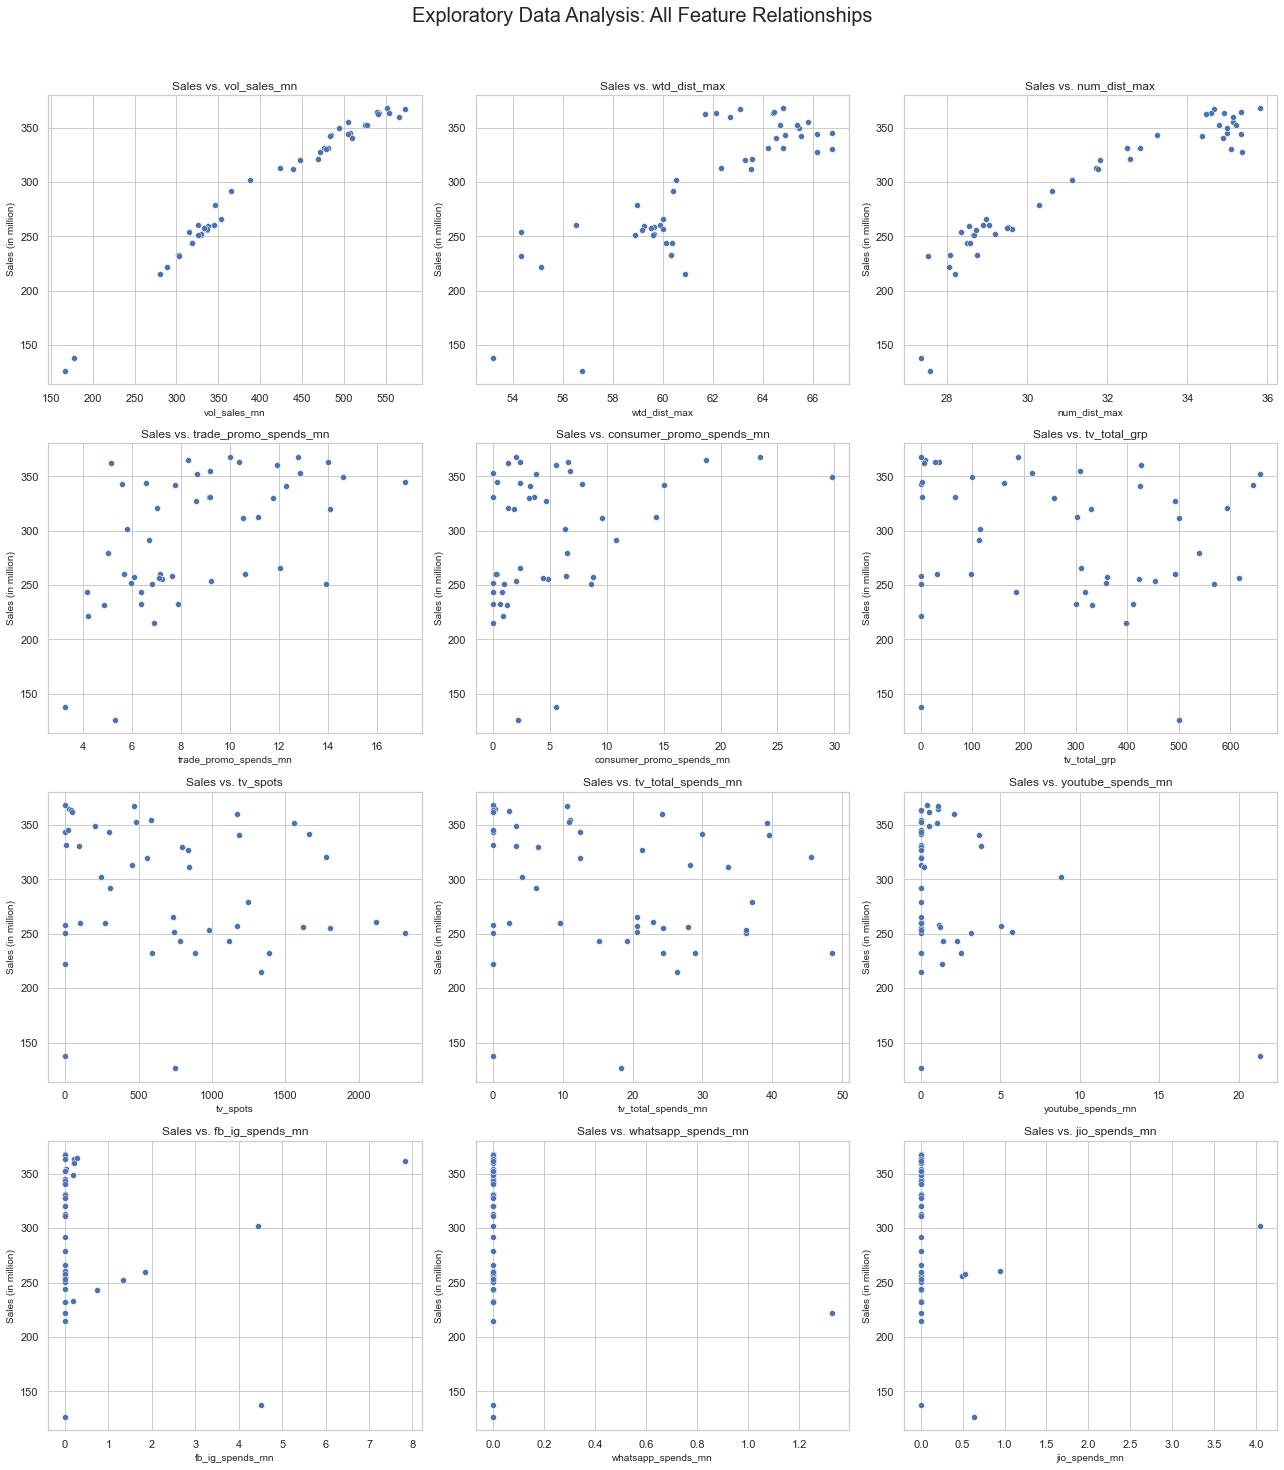

In [12]:
# Calculate the number of rows needed for the subplots
num_plots = len(features_to_plot)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, num_rows * 5))
fig.suptitle('Exploratory Data Analysis: All Feature Relationships', fontsize=20, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a scatter plot for each feature against sales
for i, feature in enumerate(features_to_plot):
    sns.scatterplot(ax=axes[i], x=feature, y='kpi_val_sales_mn', data=df_clean)
    axes[i].set_title(f'Sales vs. {feature}', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Sales (in million)', fontsize=10)

# Hide any unused subplots
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

* Sales vs. vol_sales_mn: This plot shows a perfect positive correlation. This is expected, as vol_sales_mn and kpi_val_sales_mn likely represent the same sales data, possibly in different units or with a minor transformation. This confirms data consistency but provides no new insights into what drives sales.
* Sales vs. wtd_dist_max & num_dist_max: The plots for distribution metrics show a positive correlation with sales, which is logical. Broader distribution and a higher number of stores selling the product are associated with higher sales.
* Sales vs. trade_promo_spends_mn & consumer_promo_spends_mn: These graphs show a positive but more scattered relationship with sales. This suggests that trade and consumer promotions have a positive effect, but their impact is less consistent.
* Similarly Sales vs. TV, Facebook, Whatsapp and Jio spents showing less impact on sales.

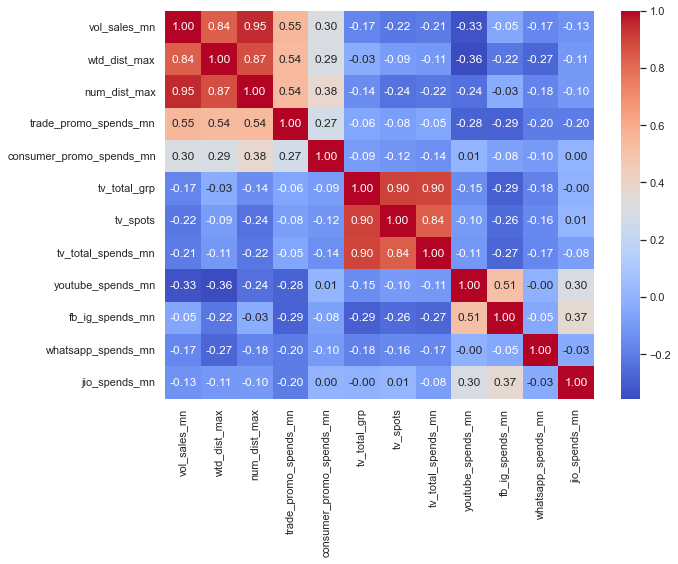

In [13]:
# Lets understand above scenario in better way by HeatMap
correlation_matrix = df[features_to_plot].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True,cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

The above heatmap clearly shows the relationship between vol_sales_mn and other features.

#### Time Series Decomposition on Sales Data

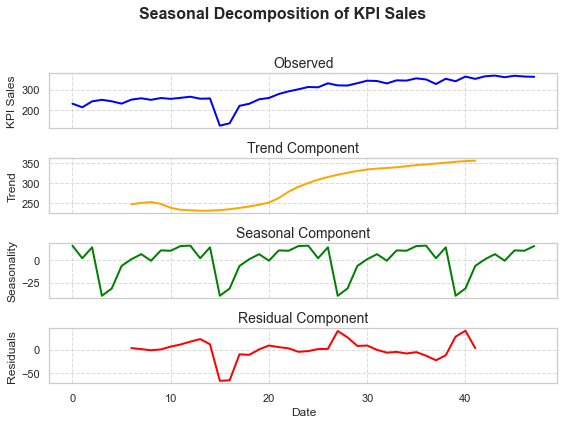

In [14]:
# Perform decomposition
decomposition = seasonal_decompose(df['kpi_val_sales_mn'], model='additive', period=12)

# Create a bigger figure
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot each component with customization
decomposition.observed.plot(ax=axes[0], color='blue', linewidth=2)
axes[0].set_ylabel('KPI Sales', fontsize=12)
axes[0].set_title('Observed', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.7)

decomposition.trend.plot(ax=axes[1], color='orange', linewidth=2)
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].set_title('Trend Component', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.7)

decomposition.seasonal.plot(ax=axes[2], color='green', linewidth=2)
axes[2].set_ylabel('Seasonality', fontsize=12)
axes[2].set_title('Seasonal Component', fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.7)

decomposition.resid.plot(ax=axes[3], color='red', linewidth=2)
axes[3].set_ylabel('Residuals', fontsize=12)
axes[3].set_title('Residual Component', fontsize=14)
axes[3].grid(True, linestyle='--', alpha=0.7)

# Set common labels and title
axes[3].set_xlabel('Date', fontsize=12)
fig.suptitle('Seasonal Decomposition of KPI Sales', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

**The above diagram shows four subplots representing the decomposition of the KPI Sales time series into its components: Observed, Trend, Seasonal, and Residual.**
* **Observed Component** : This is the actual data of KPI sales over time. The plot shows an increasing trend over time, but there’s a noticeable dip around early 2020. The dip likely corresponds to disruptions (such as the COVID-19 pandemic affecting sales). After that period, sales gradually recover and trend upward.
* **Trend Component** : The trend shows the overall direction of KPI sales, smoothing out short-term fluctuations. It confirms that sales were relatively stable before early 2020, then declined briefly, and recovered into a consistent upward trend. This indicates long-term growth despite temporary disruptions.
* **Seasonal Component** : The seasonal plot highlights patterns that repeat regularly over time. There’s a cyclical pattern visible across years, suggesting that sales have predictable ups and downs at certain times of the year. The dips and peaks likely correspond to recurring events like holidays, promotions, or other seasonally driven behavior.
* **Residual Component** : The residuals are what’s left after removing the trend and seasonal effects — essentially, random noise or unexplained variations. The residuals hover around zero most of the time but show occasional sharp deviations. Large residuals, especially around early 2020, suggest anomalies or external shocks not captured by trend or seasonality (again, possibly pandemic-related disruptions).

#### Spread of The Data

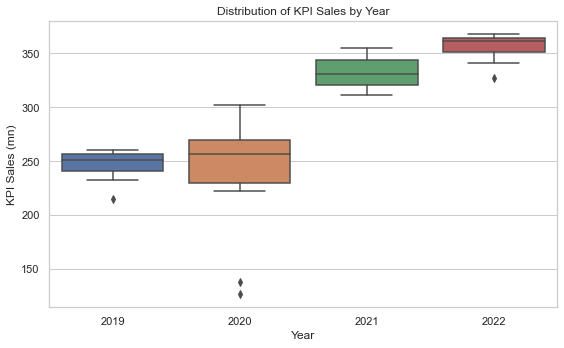

In [15]:
# Box plot to show sales distribution by year
df_box_plot = df.copy()
df_box_plot.set_index('date', inplace=True)

df_box_plot['year'] = df_box_plot.index.year
plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='kpi_val_sales_mn', data=df_box_plot)
plt.title('Distribution of KPI Sales by Year')
plt.xlabel('Year')
plt.ylabel('KPI Sales (mn)')
plt.tight_layout()
plt.show()

Overall, the box plot clearly demonstrates a positive upward trend in KPI sales from 2019 to 2022. Each year's median sales are higher than the previous year, showing consistent growth. The spread of the data (the size of the box) varies each year, indicating fluctuations in sales consistency. For example, sales were most consistent in 2019 and 2022 and most varied in 2020.

### Model Building and Analysis - Market Mix Model (OLS Based)

In [16]:
# Define a function to apply adstock transformation
def adstock(data, decay_rate):
    adstocked_data = np.zeros_like(data, dtype=float)
    if data.shape[0] > 0:
        adstocked_data[0] = data[0]
        for t in range(1, len(data)):
            adstocked_data[t] = data[t] + decay_rate * adstocked_data[t - 1]
    return adstocked_data

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['trend'] = np.arange(len(df)) + 1

marketing_spends = [
    'trade_promo_spends_mn', 'consumer_promo_spends_mn',
    'newspaper_spends_mn', 'tv_total_spends_mn',
    'google_display_spends_mn', 'youtube_spends_mn',
    'fb_ig_spends_mn', 'whatsapp_spends_mn',
    'jio_spends_mn', 'hotstar_spends_mn',
    'ventes_avenue_spends_mn'
]

non_marketing = [
    'wtd_dist_max', 'num_dist_max',
    'competition1_newspaper_spends_mn', 'competition1_tv_total_spends_mn',
    'competition2_newspaper_spends_mn', 'competition2_tv_total_spends_mn'
]

# Perform Manual Grid Search for Hyperparameter Tuning
decay_rates = [0.2,0.8]
best_r2 = -np.inf
best_params = None

X = df.drop(columns=['kpi_val_sales_mn'])
y = df['kpi_val_sales_mn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("Starting manual grid search for optimal adstock decay rates...")
def evaluate_params(params_tuple):
    params = dict(zip(marketing_spends, params_tuple))
    
    X_train_transformed = X_train.copy()
    X_val_transformed = X_val.copy()
    
    for channel, decay_rate in params.items():
        X_train_transformed[channel] = adstock(X_train_transformed[channel].values, decay_rate)
        X_train_transformed[channel] = np.log1p(X_train_transformed[channel])
        
        X_val_transformed[channel] = adstock(X_val_transformed[channel].values, decay_rate)
        X_val_transformed[channel] = np.log1p(X_val_transformed[channel])
        
    X_train_final = pd.concat([
        X_train_transformed[marketing_spends + non_marketing + ['trend']], 
        pd.get_dummies(X_train_transformed['month'], drop_first=True)
    ], axis=1)
    
    X_val_final = pd.concat([
        X_val_transformed[marketing_spends + non_marketing + ['trend']], 
        pd.get_dummies(X_val_transformed['month'], drop_first=True)
    ], axis=1)
    
    X_val_final = X_val_final.reindex(columns=X_train_final.columns, fill_value=0)
    
    model = LinearRegression()
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_val_final)
    r2 = r2_score(y_val, y_pred)
    
    return r2, params

Starting manual grid search for optimal adstock decay rates...


In [18]:
# Generate all combinations of decay rates
all_combinations = list(product(decay_rates, repeat=len(marketing_spends)))
total_tasks = len(all_combinations)

# Shared counter for tracking progress
counter = [0]  # Using a mutable object for thread safety

def evaluate_params_with_progress(params_tuple):
    result = evaluate_params(params_tuple)  # Your original evaluation
    
    # Update counter and print progress
    counter[0] += 1
    progress = (counter[0] / total_tasks) * 100
    if counter[0] % max(1, total_tasks // 10) == 0 or counter[0] == total_tasks:
        print(f"Progress: {progress:.0f}% ({counter[0]}/{total_tasks})")
        
    return result

# Run in parallel using threads instead of processes
results = Parallel(n_jobs=-1, backend='threading', verbose=0)(
    delayed(evaluate_params_with_progress)(params_tuple) for params_tuple in all_combinations
)

# Find the best result
best_r2, best_params = max(results, key=lambda x: x[0])

print("----------------------------------------------")
print("Best R-squared on validation set:", best_r2)
print("----------------------------------------------")
print("Best adstock decay rates:", best_params)
print("----------------------------------------------")


Progress: 10% (204/2048)
Progress: 20% (408/2048)
Progress: 30% (612/2048)
Progress: 40% (816/2048)
Progress: 50% (1020/2048)
Progress: 60% (1224/2048)
Progress: 70% (1428/2048)
Progress: 80% (1632/2048)
Progress: 90% (1836/2048)
Progress: 100% (2040/2048)
Progress: 100% (2048/2048)
----------------------------------------------
Best R-squared on validation set: 0.9213662255384383
----------------------------------------------
Best adstock decay rates: {'trade_promo_spends_mn': 0.2, 'consumer_promo_spends_mn': 0.8, 'newspaper_spends_mn': 0.8, 'tv_total_spends_mn': 0.8, 'google_display_spends_mn': 0.8, 'youtube_spends_mn': 0.2, 'fb_ig_spends_mn': 0.2, 'whatsapp_spends_mn': 0.8, 'jio_spends_mn': 0.8, 'hotstar_spends_mn': 0.8, 'ventes_avenue_spends_mn': 0.8}
----------------------------------------------


In [19]:
# Fit the Final Model with the Best Parameters
print("\nFitting the best model on the entire dataset...")
df_final = df.copy()

for channel, decay_rate in best_params.items():
    df_final[channel] = adstock(df_final[channel].values, decay_rate)
    df_final[channel] = np.log1p(df_final[channel])

features = marketing_spends + non_marketing + ['trend']
X_final = pd.concat([df_final[features], pd.get_dummies(df_final['month'], drop_first=True, prefix='month')], axis=1)
y_final = df_final['kpi_val_sales_mn']

scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)
final_model = LinearRegression()
final_model.fit(X_final_scaled, y_final)

# Save and Display Final Results
coefficients = pd.DataFrame({
    'Features': X_final.columns,
    'Coefficient': final_model.coef_
})

print("\nModel Coefficients:")
print(coefficients)
print("\nModel Intercept:",final_model.intercept_)

y_pred_final = final_model.predict(X_final_scaled)
print("Accuraccy (R2 Score) : ", r2_score(y_final, y_pred_final))
print("Mean Squared Error (MSE): ", mean_squared_error(y_final, y_pred_final))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_final, y_pred_final)))



Fitting the best model on the entire dataset...

Model Coefficients:
                            Features  Coefficient
0              trade_promo_spends_mn     5.025396
1           consumer_promo_spends_mn    -1.447882
2                newspaper_spends_mn    16.732846
3                 tv_total_spends_mn    -4.095847
4           google_display_spends_mn    -4.179668
5                  youtube_spends_mn    -4.269420
6                    fb_ig_spends_mn    -4.603404
7                 whatsapp_spends_mn    12.436451
8                      jio_spends_mn   -13.829914
9                  hotstar_spends_mn     7.441757
10           ventes_avenue_spends_mn     0.207058
11                      wtd_dist_max     7.014672
12                      num_dist_max    42.158050
13  competition1_newspaper_spends_mn     4.576596
14   competition1_tv_total_spends_mn    -4.781998
15  competition2_newspaper_spends_mn     1.845460
16   competition2_tv_total_spends_mn     3.425290
17                            

* Our model is performing very well. It is able to explain over 96% of the changes in our sales, which means it understands the factors driving sales almost perfectly. This gives us confidence that the model is capturing the right patterns and relationships.

* Additionally, the model estimates that, even without any marketing efforts, the company would still generate around 293 million Dollers in sales. This is called the baseline sales — the amount of sales we can expect without extra promotional activities.

* When we compare the model’s predictions to the actual sales, the difference is, on average, only about 11 million Dollers. Considering the scale of the business, this is a small error, and it shows that the model is highly accurate and reliable.


**Above we can see model coefficients as well, some features have very small or even negative coefficients, meaning they contribute little or could introduce noise. Handling such features properly is essential to prevent overfitting and ensure the model generalizes well to unseen data.**

Here Regularization is coming into the picture..

Regularization helps by adding a penalty term to the loss function, which discourages the model from assigning too much importance to certain features, making the model more generalizable and robust.

**Here we are moving forward with Lasso Regression (L1 Regularization) Because :**
* Many media channels, especially digital ones, might have little or noisy effects. Lasso helps by shrinking some coefficients exactly to zero, effectively removing them from the model.
* Market Mix Models are often used for decision-making. Having fewer, more meaningful features helps stakeholders understand which channels matter most.
* By penalizing less important features, Lasso avoids letting noise distort predictions on new data.

#### Regulatization - To remove important of irrelevant features

In [20]:
# Lasso Regression with cross-validation
lasso_cv = LassoCV(
    alphas=np.logspace(-6,0,100), # Range of alpha values to test
    cv=10,                         # 5-fold cross-validation
    max_iter=10000,                  # Ensure convergence
    random_state=42
)

# Fit the model
print("Fitting LassoCV Regularization model : ")
lasso_cv.fit(X_final_scaled, y_final)

# Extract results
best_alpha = lasso_cv.alpha_
print(f"Best alpha selected: {best_alpha}")

# Coefficients
coefficients = pd.DataFrame({
    'Features': X_final.columns,
    'Coefficient': lasso_cv.coef_
})
print("\nModel Coefficients after regularization:")
print(coefficients)

# Intercept
print("\nModel Intercept:", lasso_cv.intercept_)

# Predictions and evaluation
y_pred = lasso_cv.predict(X_final_scaled)
print("\nModel Performance:")
print("R2 Score:", r2_score(y_final, y_pred))
print("MSE:", mean_squared_error(y_final, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_final, y_pred)))

Fitting LassoCV Regularization model : 
Best alpha selected: 1.0

Model Coefficients after regularization:
                            Features  Coefficient
0              trade_promo_spends_mn     7.009981
1           consumer_promo_spends_mn     0.000000
2                newspaper_spends_mn     8.085224
3                 tv_total_spends_mn    -1.385331
4           google_display_spends_mn    -1.961142
5                  youtube_spends_mn    -3.741676
6                    fb_ig_spends_mn    -0.000000
7                 whatsapp_spends_mn     6.559936
8                      jio_spends_mn    -8.333701
9                  hotstar_spends_mn     6.508586
10           ventes_avenue_spends_mn    -0.000000
11                      wtd_dist_max     6.463443
12                      num_dist_max    42.078253
13  competition1_newspaper_spends_mn     3.558891
14   competition1_tv_total_spends_mn    -3.488572
15  competition2_newspaper_spends_mn     0.561583
16   competition2_tv_total_spends_mn     0.

**Our sales analysis provides highly reliable insights, with a model that explains 94% of the changes in our sales. To achieve this, we used a statistical technique called Lasso regression, which automatically identified and focused on only the most important features, effectively filtering out less relevant ones. This process yielded a precise model that confirmed our baseline sales figure of over 293 million dollers the revenue we can expect without any marketing efforts. The model's predictions are, on average, only 13 million away from our actual sales, further confirming its accuracy. Ultimately, the analysis highlighted a strong long-term market trend and effective campaigns in newspaper and Google Display as our primary growth drivers, while also pinpointing channels like YouTube and Jio as areas requiring strategic re-evaluation.**

## Contributions, ROIs and Recommendations for Budget Allocation.

#### Contributions of Marketing channels

In [21]:
# Account for adstock (carryover effect) with a simple decay model
def adstock(x, rate=0.5):
    return x + x.shift(1) * rate

# Apply adstock to relevant features
df['tv_total_spends_mn_adstock'] = adstock(df['tv_total_spends_mn'])
df['google_display_spends_mn_adstock'] = adstock(df['google_display_spends_mn'])
df['youtube_spends_mn_adstock'] = adstock(df['youtube_spends_mn'])
df['fb_ig_spends_mn_adstock'] = adstock(df['fb_ig_spends_mn'])
df['whatsapp_spends_mn_adstock'] = adstock(df['whatsapp_spends_mn'])
df['jio_spends_mn_adstock'] = adstock(df['jio_spends_mn'])
df['hotstar_spends_mn_adstock'] = adstock(df['jio_spends_mn'])

# Redefine features to use adstock variables
model_features = [
    'trade_promo_spends_mn', 'consumer_promo_spends_mn',
    'newspaper_spends_mn', 'tv_total_spends_mn_adstock',
    'google_display_spends_mn_adstock', 'youtube_spends_mn_adstock',
    'fb_ig_spends_mn_adstock', 'whatsapp_spends_mn_adstock','jio_spends_mn_adstock','hotstar_spends_mn_adstock'
]

# Calculate contribution for each channel
contributions = {}
for i, feature in enumerate(model_features):
    coefficient = lasso_cv.coef_[i]
    average_spend = df[feature].mean()
    contribution = coefficient * average_spend
    contributions[feature] = contribution

total_contribution = sum(contributions.values())
intercept = lasso_cv.intercept_
baseline_sales = intercept

print("\n--------------------------------Contribution Analysis ---------------------------------------\n")
print(f"Baseline Sales (Intercept): {baseline_sales:.2f} mn")
for channel, contribution in contributions.items():
    percentage_contribution = (contribution / (total_contribution + baseline_sales)) * 100
    print(f"Contribution of {channel}: {contribution:.2f} mn ({percentage_contribution:.2f}%)")


--------------------------------Contribution Analysis ---------------------------------------

Baseline Sales (Intercept): 293.72 mn
Contribution of trade_promo_spends_mn: 60.61 mn (18.58%)
Contribution of consumer_promo_spends_mn: 0.00 mn (0.00%)
Contribution of newspaper_spends_mn: 13.98 mn (4.28%)
Contribution of tv_total_spends_mn_adstock: -33.85 mn (-10.38%)
Contribution of google_display_spends_mn_adstock: -0.03 mn (-0.01%)
Contribution of youtube_spends_mn_adstock: -8.16 mn (-2.50%)
Contribution of fb_ig_spends_mn_adstock: -0.00 mn (-0.00%)
Contribution of whatsapp_spends_mn_adstock: 0.28 mn (0.09%)
Contribution of jio_spends_mn_adstock: -1.77 mn (-0.54%)
Contribution of hotstar_spends_mn_adstock: 1.38 mn (0.42%)


**Our analysis indicates a baseline sales figure of approximately 294 million, representing a strong foundation. Our marketing efforts contribute to this, with Trade Promotions being the most effective channel, driving over 60 million in sales and accounting for nearly 19% of the total marketing contribution. Newspaper and Hotstar also show positive contributions. However, several channels, most notably TV, YouTube, and Jio, showed negative contributions in this model. I interpret these not as a negative impact on sales, but rather as an indication of zero or unmeasurable effectiveness in the current strategy, suggesting these channels are underperforming and require re-evaluation.**

#### Return on Investments (ROI)

In [22]:
# Calculate ROI for each channel

roi = {}
for channel, contribution in contributions.items():
    total_spend = df[channel.replace('_adstock', '')].sum()
    if total_spend > 0:
        roi[channel] = contribution / total_spend
    else:
        roi[channel] = 0

print("\n--------------------------------ROI Analysis ---------------------------------------\n")
for channel, value in roi.items():
    if value > 0:
        print(f"ROI for {channel}: {value:.2f} (This means every 1 mn spent on this channel generates {value:.2f} mn in sales.)")
    else:
        print(f"ROI for {channel}: {value:.2f}")
        


--------------------------------ROI Analysis ---------------------------------------

ROI for trade_promo_spends_mn: 0.15 (This means every 1 mn spent on this channel generates 0.15 mn in sales.)
ROI for consumer_promo_spends_mn: 0.00
ROI for newspaper_spends_mn: 0.17 (This means every 1 mn spent on this channel generates 0.17 mn in sales.)
ROI for tv_total_spends_mn_adstock: -0.04
ROI for google_display_spends_mn_adstock: -0.06
ROI for youtube_spends_mn_adstock: -0.12
ROI for fb_ig_spends_mn_adstock: -0.00
ROI for whatsapp_spends_mn_adstock: 0.21 (This means every 1 mn spent on this channel generates 0.21 mn in sales.)
ROI for jio_spends_mn_adstock: -0.27
ROI for hotstar_spends_mn_adstock: 0.18 (This means every 1 mn spent on this channel generates 0.18 mn in sales.)


**Our ROI analysis reveals that WhatsApp is our most efficient channel, generating 0.21 dollers in sales for every dollar spent. Newspaper and Hotstar also show positive returns, with ROIs of 0.17 dollersand 0.18 dollers respectively. While none of these are yet profitable (where ROI > 1.0), they are the most effective at driving revenue from our investment. Conversely, channels with negative ROIs, such as TV, YouTube, and Jio, are currently ineffective at driving sales, and their budget should be re-evaluated and potentially reallocated to the higher-performing channels.**

#### Budget Allocation Recommendation

In [23]:
# Make budget allocation recommendations
print("\n-----------------------------Budget Allocation Recommendations------------------------------------\n")
sorted_roi = sorted(roi.items(), key=lambda x: x[1], reverse=True)

if sorted_roi[0][1] > 0:
    print(f"1. Increase Budget: The channel with the highest ROI is {sorted_roi[0][0]}. Consider reallocating budget from lower-performing channels to this one to maximize returns.\n")
else:
    print("No channels show a positive ROI based on this model, or all spends are zero.")

if len(sorted_roi) > 1 and sorted_roi[-1][1] < 0:
    print(f"2. Re-evaluate/Decrease Budget: The channel with the lowest or negative ROI is {sorted_roi[-1][0]}. Analyze its performance further or consider reducing its budget allocation.")

    
print("\n-------------------------------------------------------------------------------------------------\n")
    


-----------------------------Budget Allocation Recommendations------------------------------------

1. Increase Budget: The channel with the highest ROI is whatsapp_spends_mn_adstock. Consider reallocating budget from lower-performing channels to this one to maximize returns.

2. Re-evaluate/Decrease Budget: The channel with the lowest or negative ROI is jio_spends_mn_adstock. Analyze its performance further or consider reducing its budget allocation.

-------------------------------------------------------------------------------------------------



**Based on the analysis, my recommendations for budget allocation are clear and data-driven. The channel with the highest ROI is WhatsApp, and I would therefore recommend increasing investment in this area by reallocating funds from lower-performing channels to maximize our return. Conversely, the channel with the lowest or negative ROI is Jio, indicating it is not an effective driver of sales. I would recommend either a significant decrease in its budget or a complete re-evaluation of our strategy for this platform. This strategic shift will ensure our marketing spend is optimized and generates the highest possible sales contribution.**